# Project: Investigate a Dataset - [no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have selected this dataset to understand human behavior more and because I am intrested in decision making and not 
to an appointment has a lot info behind it


### Question(s) for Analysis
> 1- Is there a relation between age and not coming to the appointment ?

>2- Is there a relation between gender and not coming to the appointment ?

>3-which day of the week people tend to not show?

>4- which neighbourhoods has the lowest of people coming to their appointment?

>5- does sending SMS contribue to attending the appointment?

In [2]:
## load the necessary libraries to begin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


from the first row we can get familier with the columns, we noticed two things initially

1- Hypertension not "Hipertension"

2- Handicap not "Handcap"

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


as we see the statistics, we notice that:

1- no missing rows

2- age has -ve number

3- age exceeds 100 "it is not an issue but we can consider them outliers"

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No Null rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


data types have issues:

1- "3 &4" should be data time

2- "1" should be int

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

our target is "**No-show**" variable 


the predictors are : 

Gender 

ScheduledDay

AppointmentDay

Age

Neighbourhood

Scholarship

Hipertension

Diabetes

Alcoholism

Handcap

SMS_received

In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [10]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

## Data cleaning

In [11]:
## to convert the full date into days, weeks and months to treat them saperately and answer our question above
## but first we should convert them to datatime because they are strings
## monday = 0 

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday_Scheduled,Month_Scheduled,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,4,4


In [13]:
df.rename(columns = {'Hipertension' : 'Hypertension' , 'Handcap' : 'Handicap' , 'No-show' : 'noshow'} , inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,weekday_Scheduled,Month_Scheduled,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,4,4


we corrected some spelling mistakes and eleminate "-"

In [14]:
print(sorted(df.Age.unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


we have -ve and above 100 age , -ve values are errors , above 100 are outliers

In [15]:
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
noshow               8
weekday_Scheduled    8
Month_Scheduled      8
weekday_appointed    8
Month_appointed      8
dtype: int64

we have 8 rows that we want to exclude

In [16]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [17]:
df.drop(columns = ['ScheduledDay' ,'AppointmentDay' ,'PatientId' , 'AppointmentID'], axis= 1 , inplace=True);

In [18]:
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,weekday_Scheduled,Month_Scheduled,weekday_appointed,Month_appointed
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,5,1,6
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,5,1,6
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,4,1,6
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,4,1,6


we deleted IDs and Dates , IDs are not important , Dates we convert them into numerical 

In [19]:
df.duplicated().sum()

15455

we have duplicated rows

In [20]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

we removed the duplicated rows

In [21]:
df.columns
ss = df.columns[4:10]

for c in ss:

    print( c,'{}'. format(df[c].unique()))
    

Hypertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
Handicap [0 1 2 3 4]
SMS_received [0 1]
noshow ['No' 'Yes']


to make sure we have unique values

In [22]:
df.dtypes

Gender               object
Age                   int64
Neighbourhood        object
Scholarship           int64
Hypertension          int64
Diabetes              int64
Alcoholism            int64
Handicap              int64
SMS_received          int64
noshow               object
weekday_Scheduled     int64
Month_Scheduled       int64
weekday_appointed     int64
Month_appointed       int64
dtype: object

In [23]:
df.drop(columns=['Scholarship' , 'Hypertension' , 'Diabetes','Alcoholism', 'Handicap' ,'Month_Scheduled' , 'Month_appointed' ],inplace=True)

In [24]:
df.drop(columns=['weekday_Scheduled'],inplace=True)

we dropped everything that will not help us answer our questions

In [25]:
df

,Gender,Age,Neighbourhood,SMS_received,noshow,weekday_appointed
0,F,62,JARDIM DA PENHA,0,No,4
1,M,56,JARDIM DA PENHA,0,No,4
2,F,62,MATA DA PRAIA,0,No,4
3,F,8,PONTAL DE CAMBURI,0,No,4
4,F,56,JARDIM DA PENHA,0,No,4
...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,1,No,1
110523,F,51,MARIA ORTIZ,1,No,1
110524,F,21,MARIA ORTIZ,1,No,1
110525,F,38,MARIA ORTIZ,1,No,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95064 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             95064 non-null  object
 1   Age                95064 non-null  int64 
 2   Neighbourhood      95064 non-null  object
 3   SMS_received       95064 non-null  int64 
 4   noshow             95064 non-null  object
 5   weekday_appointed  95064 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ MB


In [27]:
df.noshow.replace(('Yes', 'No'), (1, 0), inplace=True)

To convert Yes and No to 1 and 0

In [28]:
df.head()

,Gender,Age,Neighbourhood,SMS_received,noshow,weekday_appointed
0,F,62,JARDIM DA PENHA,0,0,4
1,M,56,JARDIM DA PENHA,0,0,4
2,F,62,MATA DA PRAIA,0,0,4
3,F,8,PONTAL DE CAMBURI,0,0,4
4,F,56,JARDIM DA PENHA,0,0,4


now we are reaady to do an analysis to answer our questions

<a id='eda'></a>
## Exploratory Data Analysis


### Is there a relation between age and not coming to the appointment ?

Where the most frequent group of age we have?

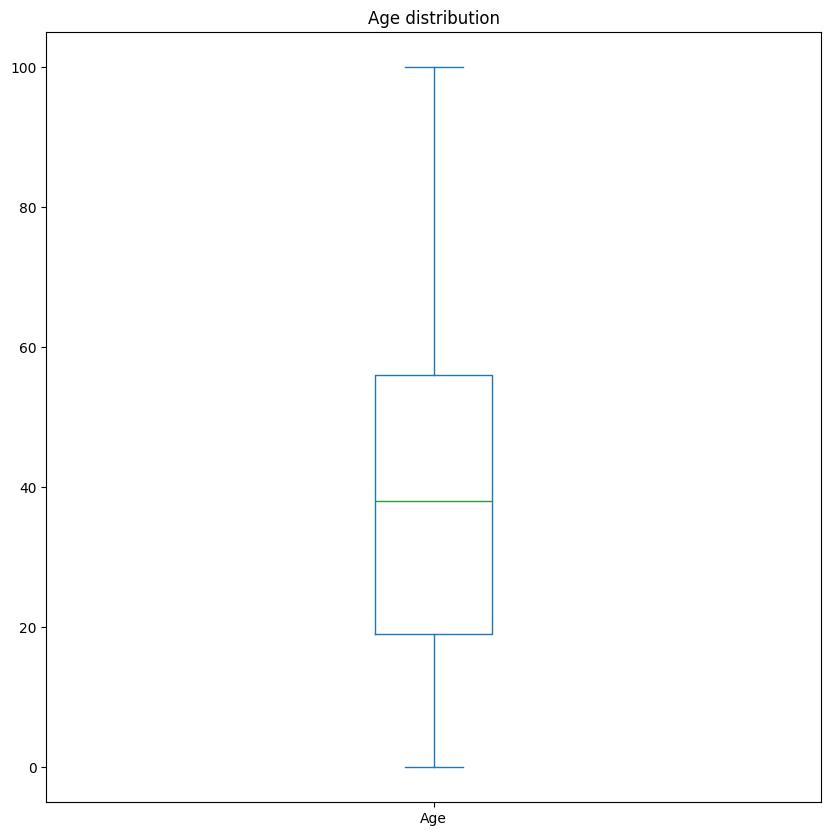

In [34]:
df['Age'].plot(kind = "box" , figsize = (10,10));
plt.title('Age distribution');

we have 50% between 20 and ~56 

what is the average age of showing and not?

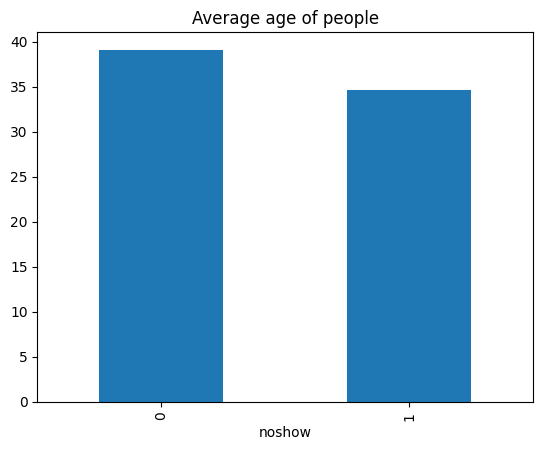

In [36]:
df.groupby('noshow')['Age'].mean().plot(kind = 'bar' , title = "Average age of people");

the average of people who come is higher

In [93]:
def plotting(col1 , showornot):
    df_1 = df[df["noshow"] == showornot]
    if showornot == 1:
        c = "didn't show"
    else:
        c = "did show"
    df_1[col1].plot(kind='hist' ,bins = 100, figsize=(10,10), title=(col1 + " of people that " + c));
    plt.xlabel(col1)

    

what the distribution of people's age that didn't show?

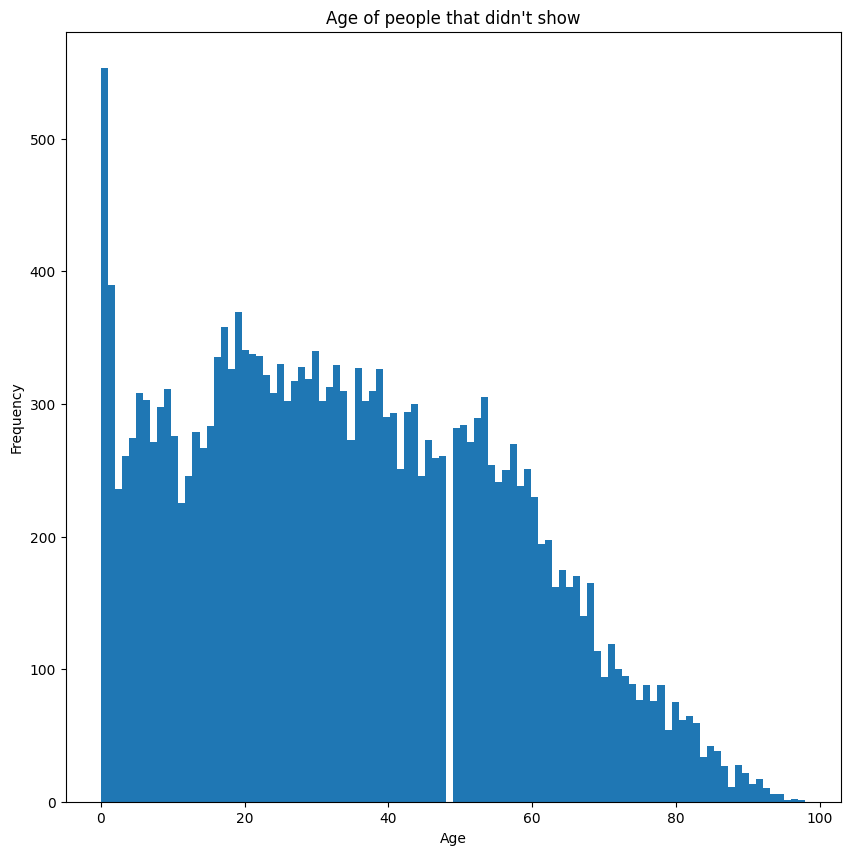

In [113]:
plotting('Age',1)

poeple from 20 - 40 mostly don't come as they have the highest frequency

what the distribution of people's age that did show?

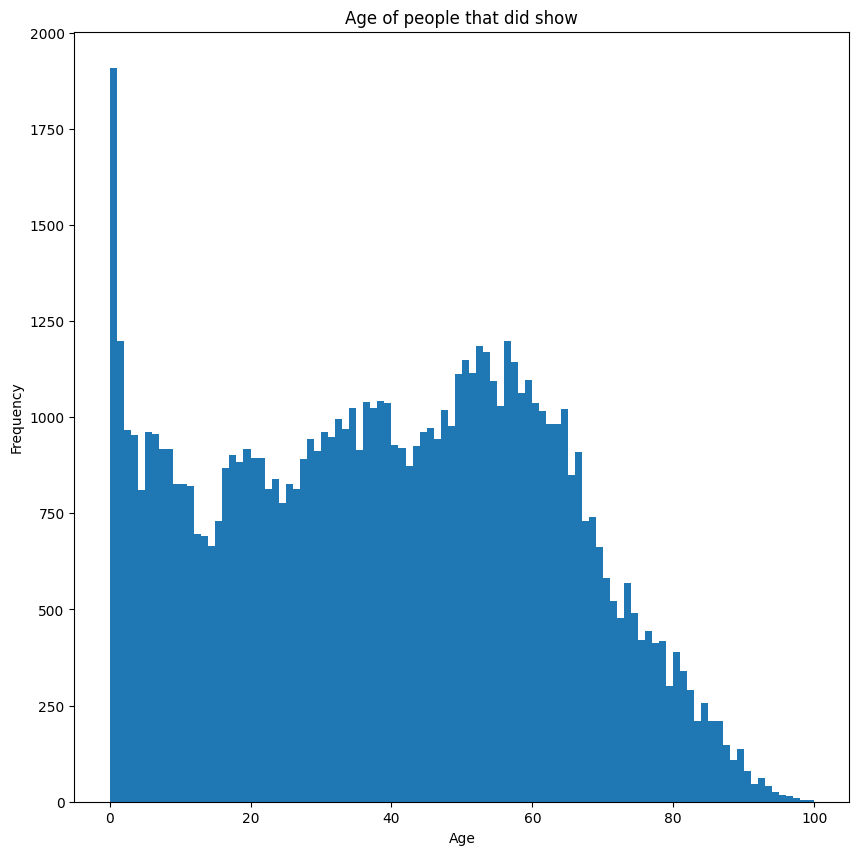

In [95]:
plotting("Age" , 0)

    poeple from 40 - 60 mostly  come as they have the highest frequency 
    This tells us that the older the person is the higher probabilty of him coming

### Is there a relation between gender and not coming to the appointment ?


what is the portion of each gender that didn't show?

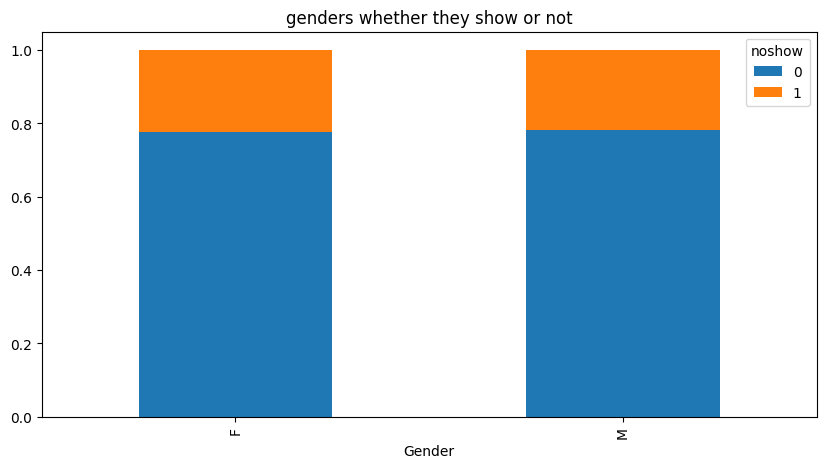

In [111]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig, ax = plt.subplots()
answer=pd.crosstab(df['Gender'],df['noshow'])
answer.div(answer.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(10,5),  ax = ax , title="genders whether they show or not");

there is no difference between the only two genders exist

### which day of the week people tend to not show?


is there a specific day people tend to not show up for the appointment?

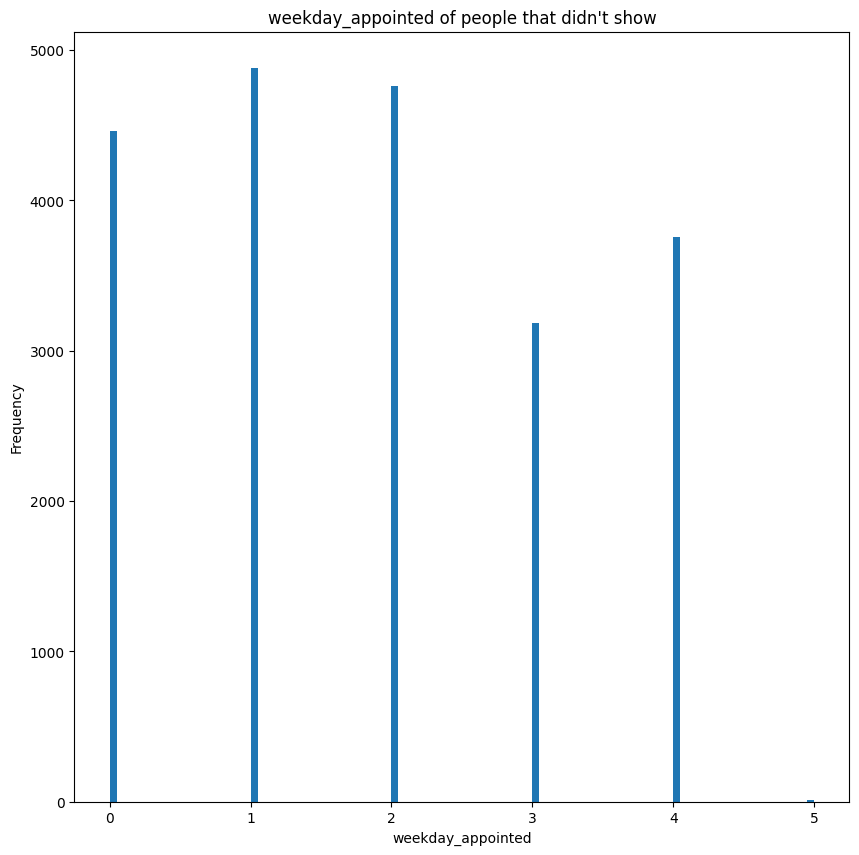

In [96]:
plotting('weekday_appointed',1)

days Monday , Tuesday and Wednesday have th highest appointments compared to the weekend

### which neighbourhoods has the lowest of people coming to their appointment?

are there specific Neighbourhoods people tend to not show up for the appointment?

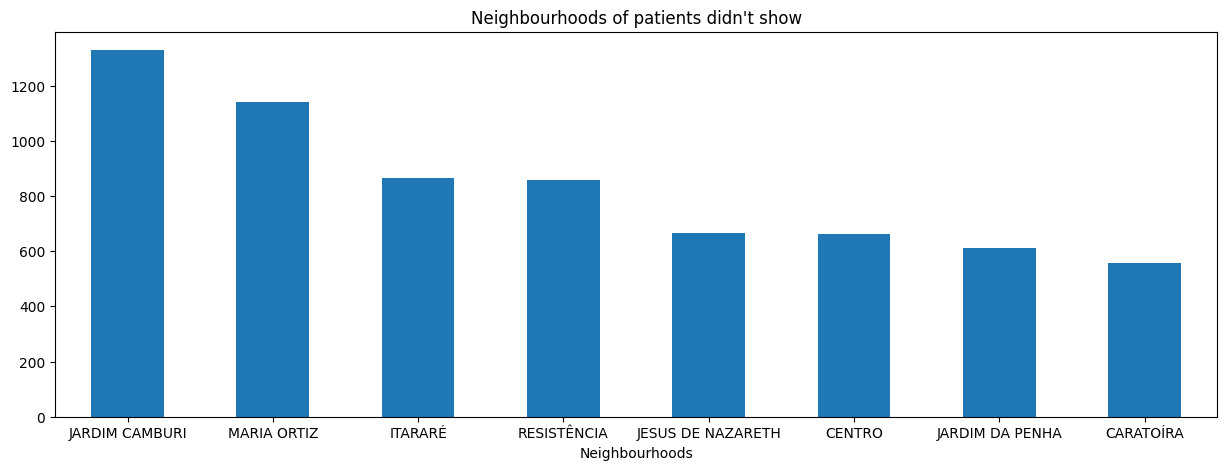

In [110]:
df[df["noshow"] == 1]["Neighbourhood"].value_counts().head(8).plot(kind = 'bar' , rot=0 , figsize = (15,5) 
, title="Neighbourhoods of patients didn't show" , xlabel="Neighbourhoods");

lowest area with people coming is  Jardim Camburi

### does sending SMS contribue to attending the appointment?

what the percentage of people that recieved SMS?

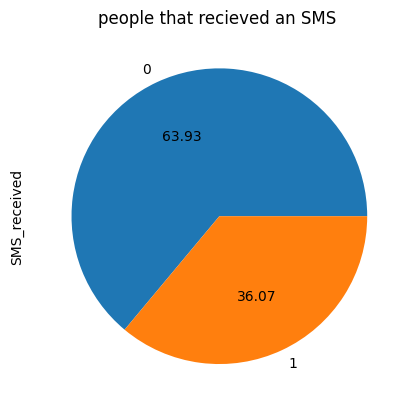

In [120]:
df['SMS_received'].value_counts().plot(kind = 'pie' , title="people that recieved an SMS " ,autopct='%.2f');

approximately 1 in 3 people recieved an SMS

does sending an SMS really make a difference?

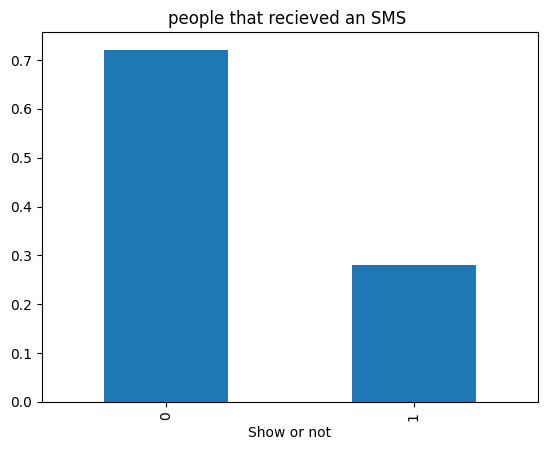

In [105]:
sm = df[df['SMS_received'] == 1]
sm["noshow"].value_counts(normalize = True).plot(kind = 'bar' , title="people that recieved an SMS " , xlabel= "Show or not");

we can say that 70% of patients who recieves the SMS will come 

## Limitations

> 1- we don't know how many SMS are sent to the patient so that we can know the ideal number of SMSs

> 2- we don't know any info about the neighbourhoods and why some of them has low rate of attending

> 3- we don't know wether there are trends or not since we have a sample of the whole year

<a id='conclusions'></a>
## Conclusions 
> the average age of people who come is higher , poeple from 20 - 40 mostly don't come , poeple from 40 - 60 mostly come <br>
This tells us that the older the person is the higher probabilty of him coming, vice versa.

>there is no difference between genders regarding showing up to the appointment <br>

>Monday , Tuesday and Wednesday have th highest appointments compared to the weekend <br>

> lowest showing up area is Jardim Camburi <br>

>we can say that 70% of patients who recieves the SMS will come



## Submitting your Project 



In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

## References

> https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html <br>
>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html <br>
>https://cs111.wellesley.edu/labs/lab15/how-to-make-a-pie-chart#:~:text=To%20label%20each%20slice%20with,2%20).
